In [1]:
import pandas as pd

In [2]:
asar = "./Animal Rescue incidents attended by LFB from Jan 2009.csv"
asar.encode('utf-8').strip()

b'./Animal Rescue incidents attended by LFB from Jan 2009.csv'

In [3]:
record = pd.read_csv(asar, encoding= 'unicode_escape')

In [4]:
print(record.SpecialServiceType.unique())

['Animal assistance involving livestock - Other action'
 'Animal rescue from below ground - Domestic pet'
 'Animal rescue from water - Farm animal'
 'Animal rescue from water - Domestic pet'
 'Wild animal rescue from height'
 'Animal rescue from height - Domestic pet'
 'Animal rescue from water - Bird' 'Animal rescue from height - Bird'
 'Wild animal rescue from water or mud'
 'Animal assistance - Lift heavy livestock animal'
 'Wild animal rescue from below ground'
 'Animal rescue from below ground - Bird'
 'Animal rescue from height - Farm animal'
 'Animal rescue from below ground - Farm animal'
 'Assist trapped domestic animal' 'Animal harm involving domestic animal'
 'Animal assistance involving wild animal - Other action'
 'Animal assistance involving domestic animal - Other action'
 'Animal harm involving wild animal' 'Assist  trapped livestock animal'
 'Assist trapped wild animal' 'Animal assistance - Lift heavy wild animal'
 'Animal assistance - Lift heavy domestic animal'
 'Ani

In [5]:
import numpy as np
import pandas as pd
seed = 69 # set random seed for whole document

# Graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying dataframes
from IPython.display import display

# Natural Language Processing Thingamajibs
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec, word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import gensim

# Classifiers
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Metrics to score classifiers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss

# Data splitting, CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Lifesaver
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddharth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
asar = "./Animal Rescue incidents attended by LFB from Jan 2009.csv"
df = pd.read_csv(asar, encoding= 'unicode_escape')

In [7]:
df.rename(columns={'IncidentNumber':'S_NO',
                  'DateTimeOfCall':'DATE_TIME',
                   'CalYear':'YEAR',
                   'FinYear':'FYEAR',
                   'TypeOfIncident':'TYPE',
                   'PumpCount':'PUMP_COUNT',
                   'PumpHoursTotal':'PUMP_TOTAL',
                   'HourlyNotionalCost(｣)':'HOUR_COST',
                   'IncidentNotionalCost(｣)':'INCI_COST',
                   'FinalDescription':'MAIN_DESCRIPTION',
                   'AnimalGroupParent':'ANIMAL_TYPE',
                   'OriginofCall':'ORIGIN',
                   'PropertyType':'PROPERTY',
                   'PropertyCategory':'PROPERTYCATEGORY',
                   'SpecialServiceTypeCategory':'SERVICE_CATEGORY',
                   'SpecialServiceType':'SERVICE_TYPE',
                   'WardCode':'WARD_CODE',
                   'Ward':'WARD',
                   'BoroughCode':'BOROUGHCODE',
                   'Borough':'BOROUGH',
                   'StnGroundName':'GROUND_NAME',
                   'UPRN':'UPRN',
                   'Street':'Street',
                   'USRN':'USRN',
                   'PostcodeDistrict':'POST_CODE',
                   'Easting_m':'EASTING',
                   'Northing_m':'NORTHING',
                   'Easting_rounded':'EASTING_R',
                   'Northing_rounded':'NORTHING_R',
                   'Latitude':'LAT',
                   'Longitude':'LONGI'
                   
                  },inplace=True)

In [8]:
#since we wanna do complaint classification we just do the row with complaints/description in them

In [9]:
df.dropna(axis=0, subset=['MAIN_DESCRIPTION'], 
          inplace=True)

In [10]:
#setting up dataframe for multiclass classification

In [11]:
# Subsetting dataframe into columns useful for our text multi-classification problem
df_product_and_complaint = df[['SERVICE_TYPE', 'MAIN_DESCRIPTION']]




In [12]:
## Pickling our subsetted dataframe
#with open('df_product_and_complaint.pickle', 'wb') as to_write:
#   pickle.dump(df_product_and_complaint, to_write)

In [13]:
# Loading our pickled subsetted dataframe
with open('df_product_and_complaint.pickle', 'rb') as to_read:
    df_product_and_complaint = pickle.load(to_read)

In [14]:
df_product_and_complaint.info()
#no null values nice

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 7311
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SERVICE_TYPE      7307 non-null   object
 1   MAIN_DESCRIPTION  7307 non-null   object
 2   S_ID              7307 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 228.3+ KB


In [15]:
df_product_and_complaint.head(5)

,SERVICE_TYPE,MAIN_DESCRIPTION,S_ID
0,Animal assistance involving livestock - Other ...,"DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15",0
1,Animal assistance involving livestock - Other ...,"ASSIST RSPCA WITH FOX TRAPPED,B15",0
2,Animal rescue from below ground - Domestic pet,"DOG CAUGHT IN DRAIN,B15",1
3,Animal rescue from water - Farm animal,"HORSE TRAPPED IN LAKE,J17",2
4,Animal assistance involving livestock - Other ...,"RABBIT TRAPPED UNDER SOFA,B15",0


In [16]:
df_product_and_complaint.SERVICE_TYPE.value_counts()

Animal rescue from height - Domestic pet                      1645
Assist trapped domestic animal                                1503
Animal rescue from height - Bird                               901
Animal assistance involving livestock - Other action           633
Assist trapped wild animal                                     593
Animal rescue from below ground - Domestic pet                 592
Animal assistance involving domestic animal - Other action     416
Animal rescue from water - Domestic pet                        234
Animal assistance involving wild animal - Other action         136
Wild animal rescue from height                                  86
Animal harm involving domestic animal                           80
Wild animal rescue from below ground                            73
Animal rescue from below ground - Bird                          68
Animal assistance - Lift heavy livestock animal                 62
Animal rescue from water - Farm animal                        

# Label encoding

In [17]:
# Applying encoding to the PRODUCT column
df_product_and_complaint['S_ID'] = df_product_and_complaint['SERVICE_TYPE'].factorize()[0]
#factorize[0] arranges the index of each encoded number accordingly to the 
# index of your categorical variables in the service_type column

# Creates a dataframe of the PRODUCT to their respective PRODUCT_ID
category_id_df = df_product_and_complaint[['SERVICE_TYPE', 'S_ID']].drop_duplicates()

# Dictionaries for future use. Creating our cheatsheets for what each encoded label represents.
category_to_id = dict(category_id_df.values) # Creates a service_type: S_ID key-value pair
id_to_category = dict(category_id_df[['S_ID', 'SERVICE_TYPE']].values)  # Creates a S_ID: SERVICE_TYPE key-value pair

In [18]:
df_product_and_complaint.head(10)

,SERVICE_TYPE,MAIN_DESCRIPTION,S_ID
0,Animal assistance involving livestock - Other ...,"DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15",0
1,Animal assistance involving livestock - Other ...,"ASSIST RSPCA WITH FOX TRAPPED,B15",0
2,Animal rescue from below ground - Domestic pet,"DOG CAUGHT IN DRAIN,B15",1
3,Animal rescue from water - Farm animal,"HORSE TRAPPED IN LAKE,J17",2
4,Animal assistance involving livestock - Other ...,"RABBIT TRAPPED UNDER SOFA,B15",0
5,Animal assistance involving livestock - Other ...,"ANIMAL TRAPPED BEHIND FIREPLACE,B15",0
6,Animal assistance involving livestock - Other ...,"DOG WITH HEAD TRAPPED IN RAILINGS,B15",0
7,Animal rescue from water - Domestic pet,"LABRADOR FALLEN THROUGH THE ICE,J15",3
8,Wild animal rescue from height,"SQUIRREL TRAPPED ON WINDOWSILL,B15",4
9,Animal rescue from water - Domestic pet,"DOG STUCK IN MUD, J15",3


In [19]:
#Now that we have encoded our columns, time to move on to the next step -- cleaning the fricken text data
#But save our dataframe here so we don't run into memory issues later and we can start from a new starting point 

In [20]:
## Pickling reduced dataframe
#with open('df_product_and_complaint.pickle', 'wb') as to_write:
#    pickle.dump(df_product_and_complaint, to_write)

In [21]:
# Loading Pickled DataFrame
with open('df_product_and_complaint.pickle', 'rb') as to_read:
    df_product_and_complaint = pickle.load(to_read)

In [22]:
# Reviewing our Loaded Dataframe
print(df_product_and_complaint.info())
print('--------------------------------------------------------------------------------------')
print(df_product_and_complaint.head().to_string())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 7311
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SERVICE_TYPE      7307 non-null   object
 1   MAIN_DESCRIPTION  7307 non-null   object
 2   S_ID              7307 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 228.3+ KB
None
--------------------------------------------------------------------------------------
                                           SERVICE_TYPE                           MAIN_DESCRIPTION  S_ID
0  Animal assistance involving livestock - Other action  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15     0
1  Animal assistance involving livestock - Other action          ASSIST RSPCA WITH FOX TRAPPED,B15     0
2        Animal rescue from below ground - Domestic pet                    DOG CAUGHT IN DRAIN,B15     1
3                Animal rescue from water - Farm animal                  HORSE TRAPPED IN LAKE,J17  

# Text Pre-Processing

In [23]:
# Looking at a sample text
sample_complaint = list(df_product_and_complaint.MAIN_DESCRIPTION[:5])[4]

# Converting to a list for TfidfVectorizer to use
list_sample_complaint = []
list_sample_complaint.append(sample_complaint)
list_sample_complaint

['RABBIT TRAPPED UNDER SOFA,B15']

In [24]:
# Observing what words are extracted from a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf3 = TfidfVectorizer(stop_words='english')
check3 = tf_idf3.fit_transform(list_sample_complaint)

print(tf_idf3.get_feature_names())

['b15', 'rabbit', 'sofa', 'trapped']


# Model/classifier selection

## train/startified/test splits

In [25]:
 # Split the data into X and y data sets
X, y = df_product_and_complaint.MAIN_DESCRIPTION, df_product_and_complaint.SERVICE_TYPE
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (7307,) y shape: (7307,)


In [26]:
# Split the data into X and y data sets
X, y = df_product_and_complaint.MAIN_DESCRIPTION, df_product_and_complaint.SERVICE_TYPE
print('X shape:', X.shape, 'y shape:', y.shape)
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.2,   # 80% train/cv, 20% test
                                                            stratify=y,
                                                            random_state=seed)
print('X_train', X_train_val.shape)
print('y_train', y_train_val.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X shape: (7307,) y shape: (7307,)
X_train (5845,)
y_train (5845,)
X_test (1462,)
y_test (1462,)


In [27]:
# Performing Text Pre-Processing

# Import tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Preprocessing
# The text needs to be transformed to vectors so as the algorithms will be able make predictions. 
# In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight 
# to evaluate how important A WORD is to A DOCUMENT in a COLLECTION OF DOCUMENTS.

# tfidf1 = 1-gram only. 
tfidf1 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5,
                        stop_words='english')

X_train_val_tfidf1 = tfidf1.fit_transform(X_train_val).toarray()
X_test_tfidf1 = tfidf1.transform(X_test)

# tfidf2 = unigram and bigram
tfidf2 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5, 
                        ngram_range=(1,2), # we consider unigrams and bigrams
                        stop_words='english')
X_train_val_tfidf2 = tfidf2.fit_transform(X_train_val).toarray()
X_test_tfidf2 = tfidf2.transform(X_test)


# # StratifiedKFold -> Split 5
# ## We now want to do stratified kfold to preserve the proportion of the category imbalances 
# # (number is split evenly from all the classes)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Baseline Model - Train/Stratified CV with MultinomialNB()

In [28]:
print('1-gram number of (rows, features):', X_train_val_tfidf1.shape)

1-gram number of (rows, features): (5845, 428)


In [29]:
def metric_cv_stratified(model, X_train_val, y_train_val, n_splits, name):
    """
    Accepts a Model Object, converted X_train_val and y_train_val, n_splits, name
    and returns a dataframe with various cross-validated metric scores 
    over a stratified n_splits kfold for a multi-class classifier.
    """
    # Start timer
    import timeit
    start = timeit.default_timer()
    
    ### Computations below
    
    # StratifiedKFold
    ## We now want to do stratified kfold to preserve the proportion of the category imbalances 
    # (number is split evenly from all the classes)
    from sklearn.model_selection import StratifiedKFold  # incase user forgest to import
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    
    # Initializing Metrics
    accuracy = 0.0
    micro_f1 = 0.0
    macro_precision = 0.0
    macro_recall = 0.0
    macro_f1 = 0.0
    weighted_precision = 0.0
    weighted_recall = 0.0
    weighted_f1 = 0.0
    roc_auc = 0.0    #Not considering this score in this case
        
    # Storing metrics
    from sklearn.model_selection import cross_val_score  # incase user forgets to import
    accuracy = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='accuracy'))
    micro_f1 = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='f1_micro'))
    macro_precision = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='precision_macro'))
    macro_recall = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='recall_macro'))
    macro_f1 = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='f1_macro'))
    weighted_precision = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='precision_weighted'))
    weighted_recall = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='recall_weighted'))
    weighted_f1 = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring='f1_weighted'))
    
    # Stop timer
    stop = timeit.default_timer()
    elapsed_time = stop - start
    
    return pd.DataFrame({'Model'    : [name],
                         'Accuracy' : [accuracy],
                         'Micro F1' : [micro_f1],
                         'Macro Precision': [macro_precision],
                         'Macro Recall'   : [macro_recall],
                         'Macro F1score'  : [macro_f1],
                         'Weighted Precision': [weighted_precision],
                         'Weighted Recall'   : [weighted_recall],
                         'Weighted F1'  : [weighted_f1],
                         'Time taken': [elapsed_time]  # timetaken: to be used for comparison later
                        })

In [30]:
# ## Data Science Story:
# # Testing on MultinomialNB first

# # Initialize Model Object
# mnb = MultinomialNB()

# results_cv_stratified_1gram = metric_cv_stratified(mnb, X_train_val_tfidf1, y_train_val, 5, 'MultinomialNB1')
# results_cv_stratified_2gram = metric_cv_stratified(mnb, X_train_val_tfidf2, y_train_val, 5, 'MultinomialNB2')

In [102]:
results_cv_stratified_1gram

NameError: name 'results_cv_stratified_1gram' is not defined

In [32]:
results_cv_stratified_2gram

NameError: name 'results_cv_stratified_2gram' is not defined

# 1-gram

In [33]:
# ## Testing on all Models using 1-gram 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# ## We do NOT want these two. They take FOREVER to train AND predict
# # knn = KNeighborsClassifier()  
# # decisiontree = DecisionTreeClassifier(random_state=seed)

# # to concat all models
# results_cv_straitified_1gram = pd.concat([metric_cv_stratified(mnb, X_train_val_tfidf1, y_train_val, 5, 'MultinomialNB1'),
#                                            metric_cv_stratified(gnb, X_train_val_tfidf1, y_train_val, 5, 'GaussianNB1'),
#                                            metric_cv_stratified(logit, X_train_val_tfidf1, y_train_val, 5, 'LogisticRegression1'),
#                                            metric_cv_stratified(randomforest, X_train_val_tfidf1, y_train_val, 5, 'RandomForest1'),
#                                            metric_cv_stratified(linearsvc, X_train_val_tfidf1, y_train_val, 5, 'LinearSVC1')
#                                           ], axis=0).reset_index()

In [34]:
results_cv_straitified_1gram

NameError: name 'results_cv_straitified_1gram' is not defined

In [35]:
#with open('results_cv_straitified_1gram_df.pickle', 'wb') as to_write:
#     pickle.dump(results_cv_straitified_1gram, to_write)

In [36]:
with open('results_cv_straitified_1gram_df.pickle', 'rb') as to_read:
    results_cv_straitified_1gram = pickle.load(to_read)

In [37]:
## Testing on all Models using 2-gram 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# knn = KNeighborsClassifier()
# decisiontree = DecisionTreeClassifier(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# # # to concat all models
# results_cv_straitified_2gram = pd.concat([metric_cv_stratified(mnb, X_train_val_tfidf2, y_train_val, 5, 'MultinomialNB2'),
#                                            metric_cv_stratified(gnb, X_train_val_tfidf2, y_train_val, 5, 'GaussianNB2'),
#                                            metric_cv_stratified(logit, X_train_val_tfidf2, y_train_val, 5, 'LogisticRegression2'),
#                                            metric_cv_stratified(randomforest, X_train_val_tfidf2, y_train_val, 5, 'RandomForest2'),
#                                            metric_cv_stratified(linearsvc, X_train_val_tfidf2, y_train_val, 5, 'LinearSVC2')
#                                           ], axis=0).reset_index()

In [38]:
results_cv_straitified_2gram

NameError: name 'results_cv_straitified_2gram' is not defined

In [39]:
results_cv_straitified_1gram

,index,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,MultinomialNB1,0.540120,0.540120,0.205778,0.183237,0.175208,0.458353,0.540120,0.474655,1.742476
1,0,GaussianNB1,0.116681,0.116681,0.141528,0.158912,0.103220,0.310021,0.116681,0.135088,9.085711
2,0,LogisticRegression1,0.568178,0.568178,0.332463,0.243235,0.246435,0.507137,0.568178,0.512977,77.167595
3,0,RandomForest1,0.445338,0.445338,0.121989,0.110248,0.089828,0.348790,0.445338,0.340372,21.212286
4,0,LinearSVC1,0.554833,0.554833,0.318929,0.274926,0.277788,0.504100,0.554833,0.512817,7.235629


In [40]:
#with open('results_cv_straitified_2gram_df.pickle', 'wb') as to_write:
#    pickle.dump(results_cv_straitified_2gram, to_write)

In [41]:
with open('results_cv_straitified_2gram_df.pickle', 'rb') as to_read:
    results_cv_straitified_2gram = pickle.load(to_read)

# Using GloVe50d


In [42]:
#Each complaint is mapped to a feature vector by averaging the word embeddings of all words in the review. 
#These features are then fed into the defined function above for train/cross validation.

In [43]:

# ## Using pre-trained GloVe
# #download from https://nlp.stanford.edu/projects/glove/

# glove_file = glove_dir = 'glove.6B.50d.txt'
# w2v_output_file = 'glove.6B.50d.txt.w2v'

# # The following utility converts file formats
# gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# # Now we can load it!
# glove_model_50d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# # Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
# with open('glove_model_50d.pickle', 'wb') as to_write:
#     pickle.dump(glove_model_50d, to_write)

In [44]:
# Load pickled glove_model
with open('glove_model_50d.pickle', 'rb') as to_read:
    glove_model_50d = pickle.load(to_read)
    
num_features = 50 # depends on the pre-trained model you are loading

In [45]:
def complaint_to_wordlist(review, remove_stopwords=False):
    """
    Convert a complaint to a list of words. Removal of stop words is optional.
    """
    # remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    
    # convert to lower case and split at whitespace
    words = review_text.lower().split()
    
    # remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    return words    # list of tokenized and cleaned words

In [46]:
# num_features refer to the dimensionality of the model you are using
# model refers to the trained word2vec/glove model
# words refer to the words in a single document/entry

def make_feature_vec(words, model, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),  # creates a zero matrix of (num_features, )
                           dtype="float32")  # pre-initialize (for speed)
    
    # Initialize a counter for the number of words in a complaint
    nwords = 0.
    index2word_set = set(model.index2word)  # words known to the model

    
    # Loop over each word in the comment and, if it is in the model's vocabulary, add its feature vector to the total
    for word in words:   # for each word in the list of words
        if word in index2word_set:   # if each word is found in the words known to the model
            nwords = nwords + 1.     # add 1 to nwords
            feature_vec = np.add(feature_vec, model[word])   
    
    # Divide by the number of words to get the average 
    if nwords > 0:
        feature_vec = np.divide(feature_vec, nwords)
    
    return feature_vec

In [47]:
# complaints refers to the whole corpus you intend to put in. 
# Therefore you need to append all these info from your df into a list first

def get_avg_feature_vecs(complaints, model, num_features):
    """
    Calculate average feature vectors for ALL complaints
    """
    # Initialize a counter for indexing 
    counter = 0
    
    # pre-initialize (for speed)
    complaint_feature_vecs = np.zeros((len(complaints),num_features), dtype='float32')  
    
    for complaint in complaints: # each complaint is made up of tokenized/cleaned/stopwords removed words
        complaint_feature_vecs[counter] = make_feature_vec(complaint, model, num_features)
        counter = counter + 1
    return complaint_feature_vecs

In [48]:
# # Tokenizing and vectorizing our Train_Val Complaints (80%)
# clean_train_val_complaints = []
# for complaint in X_train_val:
#     clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

# X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_50d, num_features)

# # Tokenizing and vectorizing our Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_50d, num_features)

In [49]:
# ## Run the X_train_val_word2vec_features into our defined function for scoring 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()


# # to concat all models
# results_cv_straitified_glove50d = pd.concat([
# #     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
#      metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove50d'),
#      metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove50d'),
#      metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove50d'),
#      metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove50d')
#     ], axis=0).reset_index()

In [50]:
# # Saving Results into a DF
# with open('results_cv_straitified_glove50d.pickle', 'wb') as to_write:
#     pickle.dump(results_cv_straitified_glove50d, to_write)

In [51]:
# Opening Results
with open('results_cv_straitified_glove50d.pickle', 'rb') as to_read:
    results_cv_straitified_glove50d = pickle.load(to_read)

In [52]:
results_cv_straitified_glove50d

,index,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,GaussianNB_glove50d,0.392814,0.392814,0.203111,0.244746,0.210257,0.397782,0.392814,0.388281,1.059376
1,0,LogisticRegression_glove50d,0.501454,0.501454,0.280851,0.209960,0.215189,0.459384,0.501454,0.451284,26.226303
2,0,RandomForest_glove50d,0.432164,0.432164,0.119473,0.120087,0.107409,0.317063,0.432164,0.342962,55.327241
3,0,LinearSVC_glove50d,0.495808,0.495808,0.235459,0.193159,0.192205,0.429242,0.495808,0.432596,147.024114


### Using GloVe100d

In [53]:
#del glove_model_50d, results_cv_straitified_glove50d

In [54]:
# ## Using pre-trained GloVe
# # download from https://nlp.stanford.edu/projects/glove/

# num_features = 100 # depends on the pre-trained model you are loading

# glove_file = glove_dir = 'glove.6B.' + str(num_features) + 'd.txt'
# w2v_output_file = 'glove.6B.' + str(num_features) + 'd.txt.w2v'

# # The following utility converts file formats
# gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# # Now we can load it!
# glove_model_100d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# # Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
# with open('glove_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
#     pickle.dump(glove_model_100d, to_write)

In [55]:
# Load pickled glove_model
with open('glove_model_100d.pickle', 'rb') as to_read:
    glove_model_100d = pickle.load(to_read)

In [56]:
# # For Train_Val Complaints (80%)
# clean_train_val_complaints = []
# for complaint in X_train_val:
#     clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

# X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_100d, num_features)

# # For Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_100d, num_features)

In [57]:
# ## Run the X_train_val_word2vec_features into our defined function for scoring 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# ## We do NOT want these two. They take FOREVER to train AND predict
# # knn = KNeighborsClassifier()  
# # decisiontree = DecisionTreeClassifier(random_state=seed)

# # to concat all models
# results_cv_straitified_glove100d = pd.concat([
# #     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
#      metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove100d'),
#      metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove100d'),
#      metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove100d'),
#      metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove100d')
#     ], axis=0).reset_index()

In [58]:
# with open('results_cv_straitified_glove100d.pickle', 'wb') as to_write:
#     pickle.dump(results_cv_straitified_glove100d, to_write)

In [59]:
# Opening Results
with open('results_cv_straitified_glove100d.pickle', 'rb') as to_read:
    results_cv_straitified_glove100d = pickle.load(to_read)

In [60]:
results_cv_straitified_glove100d

,index,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,GaussianNB_glove100d,0.407528,0.407528,0.233434,0.283323,0.234904,0.451500,0.407528,0.417535,1.431750
1,0,LogisticRegression_glove100d,0.550214,0.550214,0.323551,0.261588,0.268414,0.499682,0.550214,0.504889,39.701219
2,0,RandomForest_glove100d,0.457314,0.457314,0.121513,0.130589,0.116406,0.329671,0.457314,0.365411,76.902029
3,0,LinearSVC_glove100d,0.552438,0.552438,0.338310,0.267908,0.273771,0.503821,0.552438,0.504627,214.637019


### Using GloVe200d

In [61]:
#del glove_model_100d, results_cv_straitified_glove100d

In [62]:
# ## Using pre-trained GloVe
# # download from https://nlp.stanford.edu/projects/glove/

# num_features = 200 # depends on the pre-trained model you are loading

# glove_file = glove_dir = 'glove.6B.' + str(num_features) + 'd.txt'
# w2v_output_file = 'glove.6B.' + str(num_features) + 'd.txt.w2v'

# # The following utility converts file formats
# gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# # Now we can load it!
# glove_model_200d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# # Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
# with open('glove_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
#     pickle.dump(glove_model_200d, to_write)

In [63]:
with open('glove_model_200d.pickle', 'rb') as to_read:
    glove_model_200d = pickle.load(to_read)

In [64]:
# # For Train_Val Complaints (80%)
# clean_train_val_complaints = []
# for complaint in X_train_val:
#     clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

# X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_200d, num_features)

# #Already run above
# #For Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_200d, num_features)

In [65]:
# ## Run the X_train_val_word2vec_features into our defined function for scoring 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# ## We do NOT want these two. They take FOREVER to train AND predict
# # knn = KNeighborsClassifier()  
# # decisiontree = DecisionTreeClassifier(random_state=seed)

# # to concat all models
# results_cv_straitified_glove200d = pd.concat([
# #     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
#      metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove200d'),
#      metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove200d'),
#      metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove200d'),
#      metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove200d')
#     ], axis=0).reset_index()

In [66]:
# with open('results_cv_straitified_glove200d.pickle', 'wb') as to_write:
#     pickle.dump(results_cv_straitified_glove200d, to_write)

In [67]:
with open('results_cv_straitified_glove200d.pickle', 'rb') as to_read:
    results_cv_straitified_glove200d = pickle.load(to_read)

In [68]:
results_cv_straitified_glove200d

,index,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,GaussianNB_glove200d,0.438494,0.438494,0.269655,0.321288,0.270937,0.493144,0.438494,0.451923,4.214926
1,0,LogisticRegression_glove200d,0.559624,0.559624,0.349456,0.282217,0.288903,0.511302,0.559624,0.516330,57.037273
2,0,RandomForest_glove200d,0.469119,0.469119,0.124108,0.135031,0.120671,0.339093,0.469119,0.377625,107.355937
3,0,LinearSVC_glove200d,0.556373,0.556373,0.317302,0.277824,0.275487,0.510566,0.556373,0.511425,453.989843


### Using GloVe300d

In [69]:
#del glove_model_200d, results_cv_straitified_glove200d

In [70]:
# ## Using pre-trained GloVe
# # download from https://nlp.stanford.edu/projects/glove/

# num_features = 300 # depends on the pre-trained model you are loading

# glove_file = glove_dir = 'glove.6B.' + str(num_features) + 'd.txt'
# w2v_output_file = 'glove.6B.' + str(num_features) + 'd.txt.w2v'

# # The following utility converts file formats
# gensim.scripts.glove2word2vec.glove2word2vec(glove_file, w2v_output_file)

# # Now we can load it!
# glove_model_300d = gensim.models.KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

# # Pickle glove model so we don't have to do the above steps again and keep the damn glove.6b.50d in our folder
# with open('glove_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
#     pickle.dump(glove_model_300d, to_write)

In [71]:
# # Load pickled glove_model
# with open('glove_model_300d.pickle', 'rb') as to_read:
#     glove_model_300d = pickle.load(to_read)

In [72]:

# # For Train_Val Complaints (80%)
# clean_train_val_complaints = []
# for complaint in X_train_val:
#     clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

# X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, glove_model_300d, num_features)

# #Already run above
# # For Test Complaints (20%)
# clean_test_complaints = []
# for complaint in X_train_val:
#     clean_test_complaints.append(complaint_to_wordlist(complaint, True))

# X_test_glove_features = get_avg_feature_vecs(clean_test_complaints, glove_model_300d, num_features)

In [73]:
# ## Run the X_train_val_word2vec_features into our defined function for scoring 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# ## We do NOT want these two. They take FOREVER to train AND predict
# # knn = KNeighborsClassifier()  
# # decisiontree = DecisionTreeClassifier(random_state=seed)

# # to concat all models
# results_cv_straitified_glove300d= pd.concat([
#     # metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
#      metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_glove300d'),
#      metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_glove300d'),
#      metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_glove300d'),
#      metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_glove300d')
#     ], axis=0).reset_index()

In [74]:

# with open('results_cv_straitified_glove300d.pickle', 'wb') as to_write:
#     pickle.dump(results_cv_straitified_glove300d, to_write)

In [75]:
# Opening Results
with open('results_cv_straitified_glove300d.pickle', 'rb') as to_read:
    results_cv_straitified_glove300d = pickle.load(to_read)

In [76]:
results_cv_straitified_glove300d

,index,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,GaussianNB_glove300d,0.423952,0.423952,0.267595,0.321662,0.270538,0.483721,0.423952,0.438690,5.351046
1,0,LogisticRegression_glove300d,0.563216,0.563216,0.355575,0.285609,0.291020,0.515556,0.563216,0.521305,52.767000
2,0,RandomForest_glove300d,0.482806,0.482806,0.140454,0.138775,0.124503,0.372200,0.482806,0.390671,116.899824
3,0,LinearSVC_glove300d,0.555175,0.555175,0.307301,0.279014,0.279385,0.505137,0.555175,0.514641,508.521242


# GoogleNews Word2Vec300d

In [77]:
#del glove_model_300d, results_cv_straitified_glove300d

In [78]:
# ## Using pre-trained GoogleNews Word2Vec
# # download from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

# num_features = 300 # depends on the pre-trained model you are loading

# # Path to where the word2vec file lives
# google_vec_file = 'GoogleNews-vectors-negative300.bin'

# # Load it!  This might take a few minutes...
# word2vec_model_300d = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)
# # it is just loading all the different weights (embedding) into python


# # Pickle word2vec 300d model so we don't have to do the above steps again and keep the damn file in our folder
# with open('word2vec_model_' + str(num_features) + 'd.pickle', 'wb') as to_write:
#     pickle.dump(word2vec_model_300d, to_write)

In [79]:
# Load pickled glove_model
with open('word2vec_model_300d.pickle', 'rb') as to_read:
    word2vec_model_300d = pickle.load(to_read)

In [80]:
# # For Train_Val Complaints (80%)
# clean_train_val_complaints = []
# for complaint in X_train_val:
#     clean_train_val_complaints.append(complaint_to_wordlist(complaint, True))

# X_train_val_glove_features = get_avg_feature_vecs(clean_train_val_complaints, word2vec_model_300d, num_features)

In [81]:
# ## Run the X_train_val_word2vec_features into our defined function for scoring 

# # Initialize Model Object
# gnb = GaussianNB()
# mnb = MultinomialNB()
# logit = LogisticRegression(random_state=seed)
# randomforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
# linearsvc = LinearSVC()

# ## We do NOT want these two. They take FOREVER to train AND predict
# # knn = KNeighborsClassifier()  
# # decisiontree = DecisionTreeClassifier(random_state=seed)

# # to concat all models
# results_cv_straitified_word2vec300d= pd.concat([
# #     metric_cv_stratified(mnb, X_train_val_glove_features, y_train_val, 5, 'MultinomialNB_glove50d'),
#      metric_cv_stratified(gnb, X_train_val_glove_features, y_train_val, 5, 'GaussianNB_word2vec300d'),
#      metric_cv_stratified(logit, X_train_val_glove_features, y_train_val, 5, 'LogisticRegression_word2vec300d'),
#      metric_cv_stratified(randomforest, X_train_val_glove_features, y_train_val, 5, 'RandomForest_word2vec300d'),
#      metric_cv_stratified(linearsvc, X_train_val_glove_features, y_train_val, 5, 'LinearSVC_word2vec300d')
#     ], axis=0).reset_index()

In [82]:
# with open('results_cv_straitified_word2vec300d.pickle', 'wb') as to_write:
#     pickle.dump(results_cv_straitified_word2vec300d, to_write)

In [83]:
# Opening Results
with open('results_cv_straitified_word2vec300d.pickle', 'rb') as to_read:
    results_cv_straitified_word2vec300d = pickle.load(to_read)

In [84]:
results_cv_straitified_word2vec300d

,index,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,0,GaussianNB_word2vec300d,0.443798,0.443798,0.275011,0.324800,0.278742,0.497051,0.443798,0.458056,6.846028
1,0,LogisticRegression_word2vec300d,0.571086,0.571086,0.340366,0.267344,0.270382,0.507931,0.571086,0.518040,60.654012
2,0,RandomForest_word2vec300d,0.487254,0.487254,0.127341,0.139426,0.123645,0.354823,0.487254,0.392394,131.267324
3,0,LinearSVC_word2vec300d,0.565098,0.565098,0.329401,0.287856,0.286680,0.508738,0.565098,0.517656,224.554236


In [182]:
#del word2vec_model_300d, results_cv_straitified_word2vec300d

# Compiling Results

In [85]:
results_compiled = pd.concat([results_cv_straitified_1gram,
                           results_cv_straitified_glove50d,
                           results_cv_straitified_glove100d,
                           results_cv_straitified_glove200d,
                           results_cv_straitified_glove300d,
                           results_cv_straitified_word2vec300d]).reset_index().drop(['level_0','index'],axis=1)

In [86]:
results_compiled.columns

Index(['Model', 'Accuracy', 'Micro F1', 'Macro Precision', 'Macro Recall',
       'Macro F1score', 'Weighted Precision', 'Weighted Recall', 'Weighted F1',
       'Time taken'],
      dtype='object')

In [87]:

with open('results_compiled.pickle', 'wb') as to_write:
    pickle.dump(results_compiled, to_write)

results_compiled

,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
0,MultinomialNB1,0.540120,0.540120,0.205778,0.183237,0.175208,0.458353,0.540120,0.474655,1.742476
1,GaussianNB1,0.116681,0.116681,0.141528,0.158912,0.103220,0.310021,0.116681,0.135088,9.085711
2,LogisticRegression1,0.568178,0.568178,0.332463,0.243235,0.246435,0.507137,0.568178,0.512977,77.167595
3,RandomForest1,0.445338,0.445338,0.121989,0.110248,0.089828,0.348790,0.445338,0.340372,21.212286
4,LinearSVC1,0.554833,0.554833,0.318929,0.274926,0.277788,0.504100,0.554833,0.512817,7.235629
5,GaussianNB_glove50d,0.392814,0.392814,0.203111,0.244746,0.210257,0.397782,0.392814,0.388281,1.059376
6,LogisticRegression_glove50d,0.501454,0.501454,0.280851,0.209960,0.215189,0.459384,0.501454,0.451284,26.226303
7,RandomForest_glove50d,0.432164,0.432164,0.119473,0.120087,0.107409,0.317063,0.432164,0.342962,55.327241
8,LinearSVC_glove50d,0.495808,0.495808,0.235459,0.193159,0.192205,0.429242,0.495808,0.432596,147.024114
9,GaussianNB_glove100d,0.407528,0.407528,0.233434,0.283323,0.234904,0.451500,0.407528,0.417535,1.431750


##### Sorting in Descending order by Accuracy

In [88]:
# Sorting results to see which one gives us the best results
results_compiled_sorted_by_accuracy = results_compiled.sort_values(by='Accuracy', ascending=False)

with open('results_compiled_sorted_by_accuracy.pickle', 'wb') as to_write:
    pickle.dump(results_compiled_sorted_by_accuracy, to_write)

results_compiled_sorted_by_accuracy

,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
22,LogisticRegression_word2vec300d,0.571086,0.571086,0.340366,0.267344,0.270382,0.507931,0.571086,0.518040,60.654012
2,LogisticRegression1,0.568178,0.568178,0.332463,0.243235,0.246435,0.507137,0.568178,0.512977,77.167595
24,LinearSVC_word2vec300d,0.565098,0.565098,0.329401,0.287856,0.286680,0.508738,0.565098,0.517656,224.554236
18,LogisticRegression_glove300d,0.563216,0.563216,0.355575,0.285609,0.291020,0.515556,0.563216,0.521305,52.767000
14,LogisticRegression_glove200d,0.559624,0.559624,0.349456,0.282217,0.288903,0.511302,0.559624,0.516330,57.037273
16,LinearSVC_glove200d,0.556373,0.556373,0.317302,0.277824,0.275487,0.510566,0.556373,0.511425,453.989843
20,LinearSVC_glove300d,0.555175,0.555175,0.307301,0.279014,0.279385,0.505137,0.555175,0.514641,508.521242
4,LinearSVC1,0.554833,0.554833,0.318929,0.274926,0.277788,0.504100,0.554833,0.512817,7.235629
12,LinearSVC_glove100d,0.552438,0.552438,0.338310,0.267908,0.273771,0.503821,0.552438,0.504627,214.637019
10,LogisticRegression_glove100d,0.550214,0.550214,0.323551,0.261588,0.268414,0.499682,0.550214,0.504889,39.701219


In [89]:
# Retrieving the Model that provides the highest Accuracy
results_highest_accuracy = results_compiled[results_compiled.Accuracy == results_compiled.Accuracy.max()]

with open('results_highest_accuracy.pickle', 'wb') as to_write:
    pickle.dump(results_highest_accuracy, to_write)

results_highest_accuracy

,Model,Accuracy,Micro F1,Macro Precision,Macro Recall,Macro F1score,Weighted Precision,Weighted Recall,Weighted F1,Time taken
22,LogisticRegression_word2vec300d,0.571086,0.571086,0.340366,0.267344,0.270382,0.507931,0.571086,0.51804,60.654012


# Splitting to 80% Train and 20% unseen data

In [92]:
# Split the data into X and y data sets
X, y = df_product_and_complaint.MAIN_DESCRIPTION, df_product_and_complaint.SERVICE_TYPE
print('X shape:', X.shape, 'y shape:', y.shape)
# For text classification, ALWAYS split data first before vectorizing.
# This is because you don't want to cheat by having features (words) from the test data already being inside your train data
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.2,   # 80% train/cv, 20% test
                                                            stratify=y,
                                                            random_state=seed)
print('X_train', X_train_val.shape)
print('y_train', y_train_val.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X shape: (7307,) y shape: (7307,)
X_train (5845,)
y_train (5845,)
X_test (1462,)
y_test (1462,)


In [93]:
# tfidf1 = 1-gram only. 
tfidf1 = TfidfVectorizer(sublinear_tf=True, # set to true to scale the term frequency in logarithmic scale.
                        min_df=5,
                        stop_words='english')
X_train_val_tfidf1 = tfidf1.fit_transform(X_train_val).toarray()
X_test_tfidf1 = tfidf1.transform(X_test)

In [94]:
# Initializing our chosen logreg model
logit = LogisticRegression()

# Fitting our model
logit_finalized = logit.fit(X_train_val_tfidf1, y_train_val)

# Obtaining prediction
y_pred = logit_finalized.predict(X_test_tfidf1)

D:\anacondasetup\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [133]:
# with open('fitted_tfidf_to_use.pickle','wb') as to_write:
#     pickle.dump(logit, to_write)

In [95]:
# # Pickle trained Model for use in Flask App
# with open('logit_finalized.pickle', 'wb') as to_write:
#     pickle.dump(logit_finalized, to_write)

In [96]:
# Now we have a pickled trained model, we can use this for our flask app!
with open('logit_finalized.pickle', 'rb') as to_read:
    logit_finalized = pickle.load(to_read)

In [110]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    
    # Creates a dataframe of the PRODUCT to their respective PRODUCT_ID
    category_id_df = df_product_and_complaint_reduced[['SERVICE_TYPE', 'S_ID']].drop_duplicates()

    # Dictionaries for future use. Creating our cheatsheets for what each encoded label represents.
    category_to_id = dict(category_id_df.values) # Creates a PRODUCT: PRODUCT_ID key-value pair
    id_to_category = dict(category_id_df[['S_ID', 'SERVICE_TYPE']].values)  # Creates a PRODUCT_ID: PRODUCT key-value pair

    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    g= sns.heatmap(conf_mat, 
                   annot=True, annot_kws={"size":10},
                   cmap=plt.cm.Reds, square=True,
                   fmt='d',
                   xticklabels=category_id_df.PRODUCT.values, 
                   yticklabels=category_id_df.PRODUCT.values)
    
#     # Changing the size of the xticks and ytick labels
#     ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
#     ax.set_xticklabels(g.get_xticklabels(), size=10);
    
    # Changing axis orientation & setting titles
    ax.set_xlabel('Prediction', size=15)
    ax.set_ylabel('Actual', rotation=0, labelpad=40,size=15)

#     plt.title("CONFUSION MATRIX - {}\n".format(name), size=16);
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

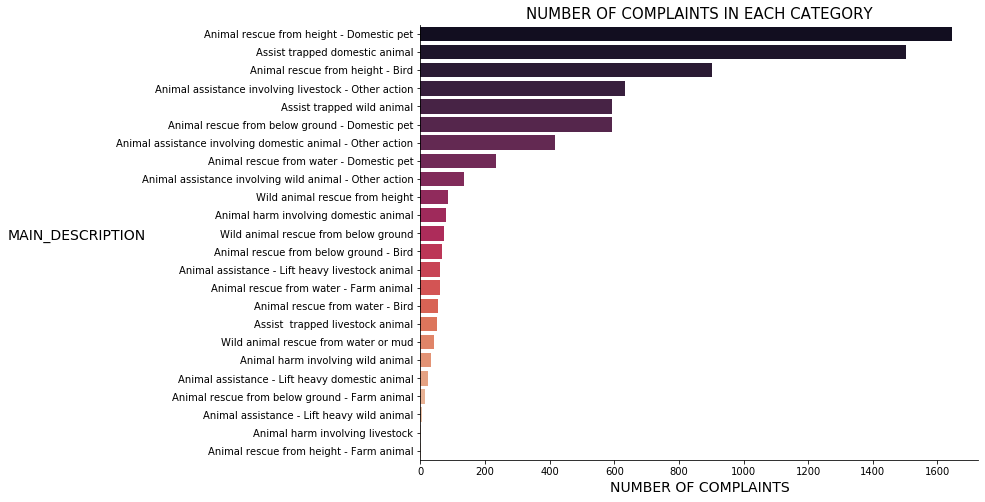

In [111]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(y='SERVICE_TYPE', 
                   data=df_product_and_complaint, 
                   order=df_product_and_complaint['SERVICE_TYPE'].value_counts().index,
                   palette='rocket'        # change the color of this graph LATER
                  )

ax.set_title('NUMBER OF COMPLAINTS IN EACH CATEGORY',size=15)

# Setting labels
# Dealing with y-labels
ax.set_ylabel('MAIN_DESCRIPTION', rotation=0, labelpad=40, size=14)
              
# Dealing with x-labels
ax.set_xlabel('NUMBER OF COMPLAINTS', size=14)

sns.despine()
plt.savefig('freq_of_removed_classes.png', transparency=True)

In [121]:
with open('results_highest_accuracy.pickle', 'rb') as to_read:
    results_highest_accuracy = pickle.load(to_read)

results_highest_accuracy

# Score model
print("---------------------------------------------------------")
print("LogisticRegression (1-gram) 80% TRAIN/20% TEST SCORES:")
print("---------------------------------------------------------")
print('\n')
print('Train/Cross-Validation Test Accuracy Score (also micro F1) for LogisticRegression: {:.4f}'.format(results_highest_accuracy.Accuracy.max()))
print('Final Test Accuracy Score (also micro F1) for LogisticRegression: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('\n')
print('Macro Precision Score for LogisticRegression: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall Score for LogisticRegression: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1 score = {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('\n')
print('Micro Precision Score for LogisticRegression: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall Score for LogisticRegression: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1 score = {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
print('\n')
print('Weighted Precision Score for LogisticRegression: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall Score for LogisticRegression: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1 score = {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\n')
print('Classification report for LogisticRegression (1-gram):\n {}'.format(classification_report(y_test, 
                                                                                             y_pred,
                                                                                             target_names=df_product_and_complaint.SERVICE_TYPE.unique())))
print('Confusion Matrix for LogisticRegression (1-gram):\n'.format(conf_matrix(y_test, y_pred)))

---------------------------------------------------------
LogisticRegression (1-gram) 80% TRAIN/20% TEST SCORES:
---------------------------------------------------------


Train/Cross-Validation Test Accuracy Score (also micro F1) for LogisticRegression: 0.5711
Final Test Accuracy Score (also micro F1) for LogisticRegression: 0.5568


Macro Precision Score for LogisticRegression: 0.3638
Macro Recall Score for LogisticRegression: 0.2487
Macro F1 score = 0.2492


Micro Precision Score for LogisticRegression: 0.5568
Micro Recall Score for LogisticRegression: 0.5568
Micro F1 score = 0.5568


Weighted Precision Score for LogisticRegression: 0.5098
Weighted Recall Score for LogisticRegression: 0.5568
Weighted F1 score = 0.5026




ValueError: Number of classes, 23, does not match size of target_names, 24. Try specifying the labels parameter

In [124]:
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)

In [125]:

# These are the ONLY packages we need to use from this point forward!
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [134]:
# Loading our saved models
# Consider training on the whole data instead now?
with open('fitted_tfidf_to_use.pickle', 'rb') as to_read:  # loading the fitted tfidf with our 80% trained data
    fitted_tfidf_to_use = pickle.load(to_read)
    
with open('logit_finalized.pickle', 'rb') as to_read:  # loading our model
    logit_finalized = pickle.load(to_read)

In [135]:
# Using our models

complaint = """
omg where is my money
aosidnoiandnaiosdnasd This is bullshit!! where is my money!!!
I TRANSFERRED IT BUT IT JUST DISAPPEARED INTO THIN AIR.
WHAT KIND OF A BANK ARE YOU?
ARE YOU A BANK OR A THIEF?"""

# After fitting the tfidf vectorizor, then you can do transforms!
new_vectorized_complaint = fitted_tfidf_to_use.transform([complaint])

# Fitting vectorized complaint into model
y_customized_prediction = logit_finalized.predict(new_vectorized_complaint)
y_customized_prediction[0]

AttributeError: 'LogisticRegression' object has no attribute 'transform'